In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('weight-height.csv')

In [3]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [4]:
df.shape

(8555, 3)

In [5]:
df.isnull().sum()

Gender    0
Height    0
Weight    0
dtype: int64

In [6]:
len(df['Height'])

8555

<AxesSubplot:xlabel='Height', ylabel='Count'>

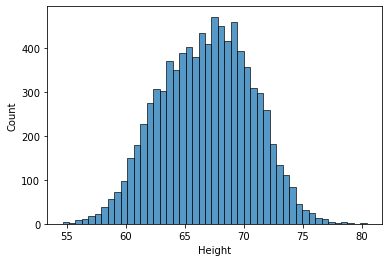

In [7]:
sns.histplot(df.Height)

<AxesSubplot:xlabel='Height', ylabel='Count'>

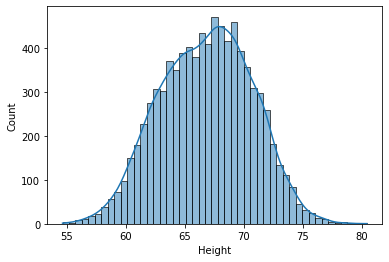

In [8]:
sns.histplot(df.Height, kde=True)

In [9]:
mean = df.Height.mean()

In [10]:
mean

66.80992512908925

In [11]:
#mean = df['Height'].sum() / len(df['Height'])

In [12]:
#mean

In [13]:
Standard_deviation = df.Height.std()

In [14]:
Standard_deviation 

3.851454431577277

In [15]:
Standard_deviation_pluse = mean+(2.5*Standard_deviation)

In [16]:
Standard_deviation_pluse

76.43856120803244

In [17]:
df[df.Height < Standard_deviation_pluse]

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
8550,Female,60.483946,110.565497
8551,Female,63.423372,129.921671
8552,Female,65.584057,155.942671
8553,Female,67.429971,151.678405


In [18]:
Standard_deviation_Minuse = mean - (2.5*Standard_deviation )

In [19]:
Standard_deviation_Minuse

57.18128905014606

In [20]:
df[df.Height < Standard_deviation_Minuse]

,Gender,Height,Weight
5026,Female,56.547975,84.872124
5074,Female,56.159458,90.815256
5122,Female,57.103869,93.506316
5123,Female,56.445685,96.640245
5214,Female,56.785434,83.993077
5345,Female,55.336492,88.366583
5360,Female,55.668202,68.982530
5732,Female,56.078700,94.488374
5740,Female,56.108902,80.531259
5958,Female,56.757604,88.884853


In [21]:
out = df[(df.Height < Standard_deviation_pluse) & (df.Height > Standard_deviation_Minuse)]

In [22]:
out.shape

(8489, 3)

<AxesSubplot:xlabel='Height', ylabel='Count'>

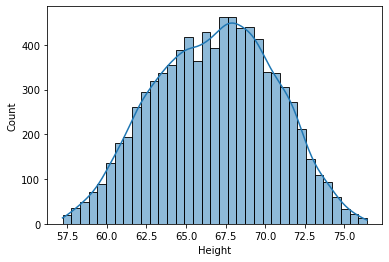

In [55]:
sns.histplot(df.Height, kde=True)

In [23]:
df = out

In [24]:
df.shape

(8489, 3)

In [26]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [27]:
from sklearn.preprocessing import LabelEncoder

In [28]:
l_Encoder = LabelEncoder()

In [29]:
df['Gender'] = l_Encoder.fit_transform(df['Gender']) 

In [30]:
df.head()

,Gender,Height,Weight
0,1,73.847017,241.893563
1,1,68.781904,162.310473
2,1,74.110105,212.740856
3,1,71.730978,220.042470
4,1,69.881796,206.349801


In [31]:
x = df.drop('Weight', axis = 1)

In [32]:
y = df['Weight']

In [33]:
x.head()

,Gender,Height
0,1,73.847017
1,1,68.781904
2,1,74.110105
3,1,71.730978
4,1,69.881796


In [34]:
y.head()

0    241.893563
1    162.310473
2    212.740856
3    220.042470
4    206.349801
Name: Weight, dtype: float64

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = .30, random_state =42)

In [37]:
from sklearn.linear_model import LinearRegression

In [38]:
Lr = LinearRegression()

In [39]:
Lr.fit(x,y) 

LinearRegression()

In [42]:
x_train.head()

,Gender,Height
15,1,67.645620
7974,0,60.621961
6600,0,64.762366
2377,1,71.120827
5147,0,65.226901


In [43]:
x_test.head()

,Gender,Height
1914,1,65.692830
5679,0,60.680846
5774,0,67.902252
8510,0,62.323058
361,1,67.486824


In [44]:
out_put = Lr.fit(x_train, y_train)

In [47]:
accuracy = Lr.score(x_test, y_test)

In [48]:
accuracy

0.9018277226172886

In [50]:
predict_output = Lr.predict([[2, 65]]) 

In [51]:
predict_output

array([181.83004414])

In [53]:
predict_output2 = Lr.predict([[1, 72]]) 

In [68]:
predict_output2

array([204.52846997])